# 1、项目背景

根据航空公司系统内的客户基本信息、乘客信息、积分信息等详细数据，选取2年的时间段，随机抽取历史数据，进行分析；

步骤：
数据探索性分析与预处理：数据缺失值与异常值探索分析、数据清洗、特征构建、标准化处理；
RFM模型、LFRMC模型分析客户特征；
针对分析得到的不同价值的客户，用不同的营销手段，提供定制化的服务

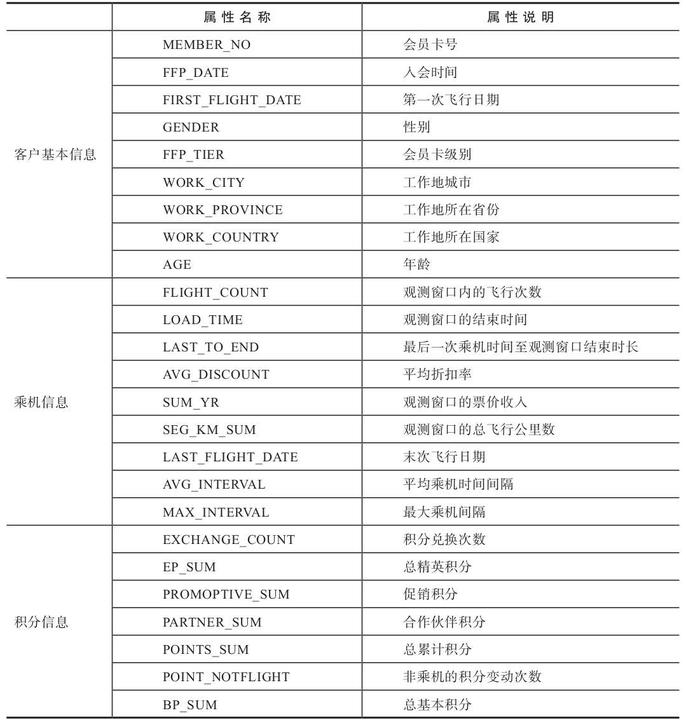

# 2、数据导入

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("air.csv",encoding='gb18030')
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [4]:
data_nal=data.isnull()
data_nal.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
import pandas as pd
#percentiles是指定计算多少的分位数，T是转置函数
explore =data.describe(percentiles=[],include='all').T
print(explore)

                           count unique        top   freq          mean  \
MEMBER_NO                62988.0    NaN        NaN    NaN       31494.5   
FFP_DATE                   62988   3068  2011/1/13    184           NaN   
FIRST_FLIGHT_DATE          62988   3406  2013/2/16     96           NaN   
GENDER                     62985      2          男  48134           NaN   
FFP_TIER                 62988.0    NaN        NaN    NaN      4.102162   
WORK_CITY                  60719   3309         广州   9385           NaN   
WORK_PROVINCE              59740   1183         广东  17507           NaN   
WORK_COUNTRY               62962    118         CN  57748           NaN   
AGE                      62568.0    NaN        NaN    NaN     42.476346   
LOAD_TIME                  62988      1  2014/3/31  62988           NaN   
FLIGHT_COUNT             62988.0    NaN        NaN    NaN     11.839414   
BP_SUM                   62988.0    NaN        NaN    NaN  10925.081254   
EP_SUM_YR_1              

In [7]:
explore['null']=len(data)-explore['count']
explore = explore[['null', 'max', 'min']]
explore.columns=[u'空值数',u'最大值',u'最小值']
print('以下是处理后数据:')
print(explore)

以下是处理后数据:
                           空值数        最大值    最小值
MEMBER_NO                  0.0    62988.0    1.0
FFP_DATE                     0        NaN    NaN
FIRST_FLIGHT_DATE            0        NaN    NaN
GENDER                       3        NaN    NaN
FFP_TIER                   0.0        6.0    4.0
WORK_CITY                 2269        NaN    NaN
WORK_PROVINCE             3248        NaN    NaN
WORK_COUNTRY                26        NaN    NaN
AGE                      420.0      110.0    6.0
LOAD_TIME                    0        NaN    NaN
FLIGHT_COUNT               0.0      213.0    2.0
BP_SUM                     0.0   505308.0    0.0
EP_SUM_YR_1                0.0        0.0    0.0
EP_SUM_YR_2                0.0    74460.0    0.0
SUM_YR_1                 551.0   239560.0    0.0
SUM_YR_2                 138.0   234188.0    0.0
SEG_KM_SUM                 0.0   580717.0  368.0
WEIGHTED_SEG_KM            0.0  558440.14    0.0
LAST_FLIGHT_DATE             0        NaN    NaN
AVG_FLIGHT

In [9]:
#数据清洗
#丢弃票价为空的记录，也删除票价为0的记录、平均折扣率不为0、总飞行公里数大于0的记录
cleanedfile='data_cleaned.xls'
data=data[data['SUM_YR_1'].notnull()& data['SUM_YR_2'].notnull()]

#票价非空值才保留，即只保留票价非0的，或者平均折扣率与总飞行公里数不同时为0，此时若票价为0，则删除，若不为0，则保留
index1=data['SUM_YR_1']!=0
index2=data['SUM_YR_2']!=0
index3=(data['SEG_KM_SUM']==0)&(data['avg_discount']==0)
data=data[index1|index2|index3]
print(data)
data.to_excel(cleanedfile,encoding='utf-8')

       MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0          54993   2006/11/2        2008/12/24      男         6            .   
1          28065   2007/2/19          2007/8/3      男         6          NaN   
2          55106    2007/2/1         2007/8/30      男         6            .   
3          21189   2008/8/22         2008/8/23      男         5  Los Angeles   
4          39546   2009/4/10         2009/4/15      男         6           贵阳   
...          ...         ...               ...    ...       ...          ...   
62974      11163    2005/5/8         2005/8/26      男         4          NaN   
62975      30765  2008/11/16        2013/11/30      男         4       TAIPEI   
62976      10380    2010/7/8         2011/6/21      男         4          贵阳市   
62977      16372  2012/12/20        2012/12/20      男         4           桃园   
62978      22761   2011/4/14         2011/4/14      男         4           汕头   

      WORK_PROVINCE WORK_COUNTRY   AGE 

C:\Users\19152\AppData\Local\Temp/ipykernel_18056/205283638.py:12: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel(cleanedfile,encoding='utf-8')


# 3、数据分析及可视化

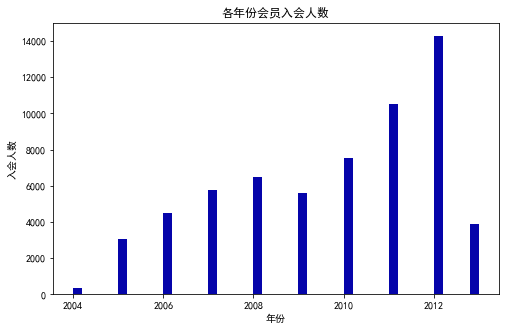

In [10]:
#客户基本信息分布分析：选取客户基本信息中的入会时间、性别、会员卡级别和年龄字段进行探索性分析，探索客户的基本信息分布情况
#各年份会员入会人数-提取会员入会年份
from datetime import datetime
ffp=data['FFP_DATE'].apply(lambda x:datetime.strptime(x,'%Y/%m/%d'))
ffp_year=ffp.map(lambda x:x.year)

#绘制各年份会员入会人数直方图
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(8,5))

plt.rcParams['font.sans-serif'] = 'SimHei'   #使得图形显示中文字体
plt.rcParams['axes.unicode_minus'] = False
plt.hist(ffp_year,bins='auto',color='#0504aa')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数')
plt.show()

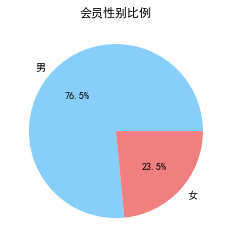

In [11]:
#抽取会员不同性别人数
male=pd.value_counts(data['GENDER'])['男']
female=pd.value_counts(data['GENDER'])['女']

#绘制会员性别比例图
fig=plt.figure(figsize=(8,4))
plt.pie([male,female],labels=['男','女'],colors=['lightskyblue','lightcoral'],autopct='%1.1f%%')
plt.title('会员性别比例')
plt.show()

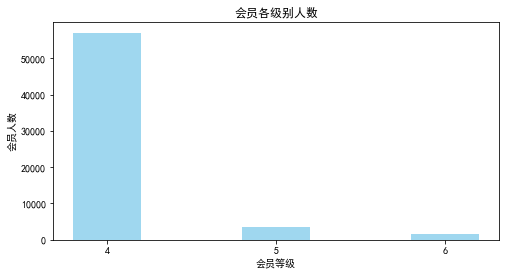

In [13]:
#提取不同级别会员的人数
lv_four=pd.value_counts(data['FFP_TIER'])[4]
lv_five=pd.value_counts(data['FFP_TIER'])[5]
lv_six=pd.value_counts(data['FFP_TIER'])[6]

#绘制会员各级别人数的条形图
fig=plt.figure(figsize=(8,4))
plt.bar(x=range(3),height=[lv_four,lv_five,lv_six],width=0.4,alpha=0.8,color='skyblue')
plt.xticks([index for index in range(3)],['4','5','6'])
plt.xlabel('会员等级')
plt.ylabel('会员人数')
plt.title('会员各级别人数')
plt.show()

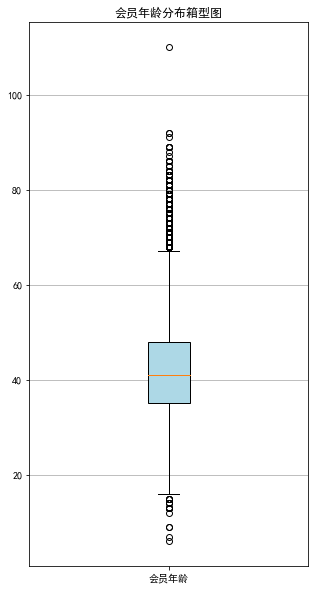

In [14]:
#提取会员年龄
age=data['AGE'].dropna()
age=age.astype('int64')
fig=plt.figure(figsize=(5,10))

#绘制会员年龄分布箱型图
plt.boxplot(age,patch_artist=True,labels=['会员年龄'],boxprops={'facecolor':'lightblue'})
plt.title('会员年龄分布箱型图')
plt.grid(axis='y')
plt.show()

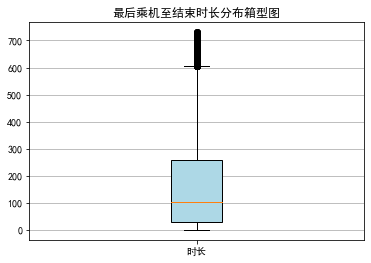

In [15]:
#绘制最后乘机至结束时长箱型图
lte=data['LAST_TO_END']
fc=data['FLIGHT_COUNT']
skc=data['SEG_KM_SUM']

plt.boxplot(lte,patch_artist=True,labels=['时长'],boxprops={'facecolor':'lightblue'})
plt.title('最后乘机至结束时长分布箱型图')
plt.grid(axis='y')
plt.show()

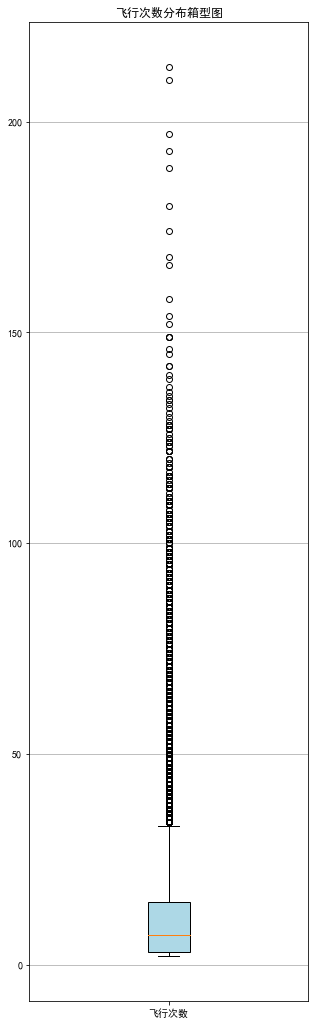

In [16]:
#绘制客户飞行次数箱型图
fig=plt.figure(figsize=(5,18))
plt.boxplot(fc,patch_artist=True,labels=['飞行次数'],boxprops={'facecolor':'lightblue'})
plt.title('飞行次数分布箱型图')
plt.grid(axis='y')
plt.show()

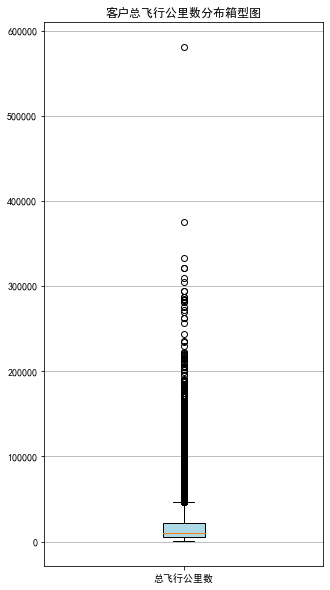

In [17]:
#绘制客户总飞行公里数箱型图
fig=plt.figure(figsize=(5,10))
plt.boxplot(skc,patch_artist=True,labels=['总飞行公里数'],boxprops={'facecolor':'lightblue'})
plt.title('客户总飞行公里数分布箱型图')
plt.grid(axis='y')
plt.show()

会员积分信息分布分析

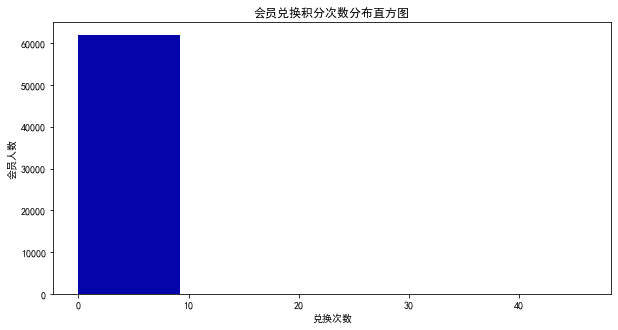

In [18]:
#提取会员积分兑换次数
ec=data['EXCHANGE_COUNT']
#绘制会员兑换积分次数直方图
fig=plt.figure(figsize=(10,5))

plt.rcParams['font.sans-serif'] = 'SimHei'   #使得图形显示中文字体
plt.rcParams['axes.unicode_minus'] = False
plt.hist(ec,bins=5,color='#0504aa')
plt.xlabel('兑换次数')
plt.ylabel('会员人数')
plt.title('会员兑换积分次数分布直方图')
plt.show()

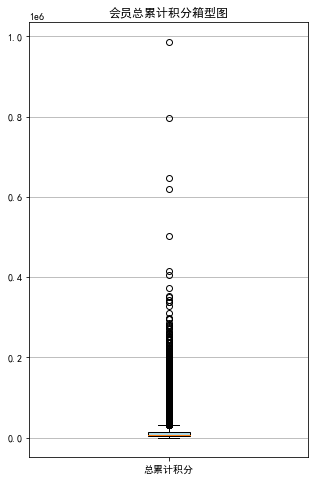

In [19]:
#提取会员总累计积分
ps=data['Points_Sum']
#绘制会员总累计积分箱型图
fig=plt.figure(figsize=(5,8))
plt.boxplot(ps,patch_artist=True,labels=['总累计积分'],boxprops={'facecolor':'lightblue'})
plt.title('会员总累计积分箱型图')
plt.grid(axis='y')
plt.show()

# 4、特征属性的相关性分析

C:\Users\19152\AppData\Local\Temp/ipykernel_18056/2397304333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['AGE']=age1.astype('int64')
C:\Users\19152\AppData\Local\Temp/ipykernel_18056/2397304333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['ffp_year']=ffp_year


相关性矩阵:
                 FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582414    -0.205467    0.522044   
FLIGHT_COUNT    0.582414      1.000000    -0.401495    0.849493   
LAST_TO_END    -0.205467     -0.401495     1.000000   -0.365155   
SEG_KM_SUM      0.522044      0.849493    -0.365155    1.000000   
EXCHANGE_COUNT  0.342731      0.503010    -0.168810    0.508301   
Points_Sum      0.559112      0.746347    -0.288689    0.852807   
AGE             0.075968      0.074406    -0.024960    0.086556   
ffp_year       -0.116135     -0.187311     0.115369   -0.170374   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342731    0.559112  0.075968 -0.116135  
FLIGHT_COUNT          0.503010    0.746347  0.074406 -0.187311  
LAST_TO_END          -0.168810   -0.288689 -0.024960  0.115369  
SEG_KM_SUM            0.508301    0.852807  0.086556 -0.170374  
EXCHANGE_COUNT        1.000000    0.578290  0.032345 -0.216965 

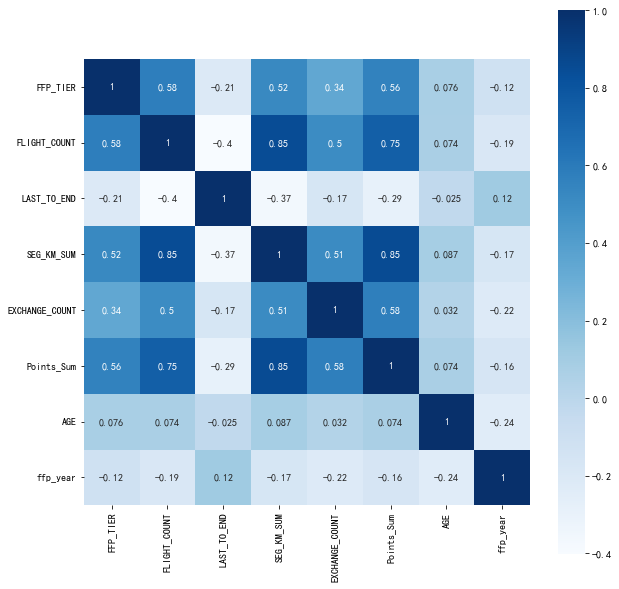

In [21]:
data_corr=data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END','SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]
age1=data['AGE'].fillna(0)
data_corr['AGE']=age1.astype('int64')
data_corr['ffp_year']=ffp_year
dt_corr=data_corr.corr(method='pearson')
print('相关性矩阵:\n',dt_corr)
import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(dt_corr,annot=True,vmax=1,square=True,cmap='Blues')
plt.show()

In [25]:
#构造相关性热力图函数
def corr_map(df):
    var_corr=df.corr()
    mask=np.zeros_like(var_corr,dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    f,ax=plt.subplots(figsize=(20,12))
    sns.set(font_scale=1)
    sns.heatmap(var_corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":5},
               annot=True,annot_kws={'size':12,'weight':'bold','color':'red'})
plt.show()

# 5、属性履约

增加两个属性：构造LRFMC模型
L=LOAD_TIME_FFP_DATE(会员入会时间距观测窗口结束的月数=观测窗口的结束时间-入会时间（单位：月）)

R=LAST_TO_END（客户最近一次乘坐公司距观测窗口结束的月数=最后一次乘机时间至观测窗口结束时长（单位：月））

F=FLIGHT_COUNT(观测窗口内的飞行次数)

M=SEG_KM_SUM(观测窗口的总飞行里程)

C=AVG_DISCOUNT(平均评价折扣率)

In [27]:
#定义reduction_data函数
def reduction_data(data):
    data=data[['LOAD_TIME','FFP_DATE','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
    d_ffp=pd.to_datetime(data['FFP_DATE'])
    d_load=pd.to_datetime(data['LOAD_TIME'])
    res=d_load-d_ffp
    data2=data.copy()
    data2['L']=res.map(lambda x:x/np.timedelta64(30*24*60,'m'))
    data2['R']=data['LAST_TO_END']
    data2['F']=data['FLIGHT_COUNT']
    data2['M']=data['SEG_KM_SUM']
    data2['C']=data['avg_discount']
    data3=data2[['L','R','F','M','C']]
    return data3
data3=reduction_data(data)
print(data3)

                L    R    F       M         C
0       90.200000    1  210  580717  0.961639
1       86.566667    7  140  293678  1.252314
2       87.166667   11  135  283712  1.254676
3       68.233333   97   23  281336  1.090870
4       60.533333    5  152  309928  0.970658
...           ...  ...  ...     ...       ...
62974  108.300000   89    2     368  0.710000
62975   65.366667  121    2     368  0.670000
62976   45.400000   39    2    1062  0.225000
62977   15.533333  464    2     904  0.250000
62978   36.066667  282    2     760  0.280000

[62044 rows x 5 columns]


In [28]:
#对L\R\F\M\C进行标准化处理
def zscore_data(data):
    data=(data-data.mean(axis=0))/data.std(axis=0)
    data.columns=['Z'+ i for i in data.columns]
    return data
data4=zscore_data(data3)
data4

,ZL,ZR,ZF,ZM,ZC
0,1.435707,-0.944948,14.034016,26.761154,1.295540
1,1.307152,-0.911894,9.073213,13.126864,2.868176
2,1.328381,-0.889859,8.718869,12.653481,2.880950
3,0.658476,-0.416098,0.781585,12.540622,1.994714
4,0.386032,-0.922912,9.923636,13.898736,1.344335
...,...,...,...,...,...
62974,2.076128,-0.460169,-0.706656,-0.805297,-0.065898
62975,0.557046,-0.283886,-0.706656,-0.805297,-0.282309
62976,-0.149421,-0.735611,-0.706656,-0.772332,-2.689885
62977,-1.206173,1.605649,-0.706656,-0.779837,-2.554628


# 6、构建聚类模型

In [32]:
#客户聚类
from sklearn.cluster import KMeans
k=5 #确定聚类中心数

#构建模型，随机种子设为123
kmeans_model=KMeans(n_clusters=k,random_state=123)

#模型训练
fit_kmeans=kmeans_model.fit(data3)
kmeans_cc=kmeans_model.cluster_centers_
print('各聚类中心为:\n',kmeans_cc)

各聚类中心为:
 [[4.63273380e+01 2.31856650e+02 5.01403999e+00 6.41901283e+03
  7.10621323e-01]
 [5.85337468e+01 4.91922638e+01 3.10378652e+01 4.61840295e+04
  7.53302598e-01]
 [6.49107203e+01 2.72317141e+01 5.35678392e+01 8.64943680e+04
  7.92421512e-01]
 [5.19712628e+01 9.73875212e+01 1.53743625e+01 2.17826823e+04
  7.27537725e-01]
 [7.04857143e+01 2.02357143e+01 7.89392857e+01 1.68453357e+05
  8.55118811e-01]]


In [33]:
#统计不同类别的样本数目
r1=pd.Series(kmeans_model.labels_).value_counts()
print('最终每个类别的数目为:\n',r1)
kmeans_labels=kmeans_model.labels_
print('各样本的类别标签为:\n',kmeans_labels)

最终每个类别的数目为:
 0    37987
3    15869
1     6117
2     1791
4      280
dtype: int64
各样本的类别标签为:
 [4 4 4 ... 0 0 0]


In [36]:
cluster_center=pd.DataFrame(kmeans_model.cluster_centers_,columns=['ZL','ZR','ZF','ZM','ZC'])
cluster_center.index=pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:,0]
print(cluster_center)

          ZL          ZR         ZF             ZM        ZC
0                                                           
4  46.327338  231.856650   5.014040    6419.012828  0.710621
2  58.533747   49.192264  31.037865   46184.029541  0.753303
1  64.910720   27.231714  53.567839   86494.367951  0.792422
3  51.971263   97.387521  15.374363   21782.682302  0.727538
0  70.485714   20.235714  78.939286  168453.357143  0.855119


In [37]:
cluster_center=pd.DataFrame(kmeans_model.cluster_centers_,columns=['ZL','ZR','ZF','ZM','ZC'])
cluster_center.index=pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:,0]

from sklearn.cluster import KMeans
k=5 

kmodel=KMeans(n_clusters=k)
kmodel.fit(data4)

#训练模型
r1=pd.Series(kmodel.labels_).value_counts()
r2=pd.DataFrame(kmodel.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
r.columns=list(data4.columns)+['类别数目']
r=pd.concat([data4,pd.Series(kmodel.labels_,index=data4.index)],axis=1)
r.columns=list(data4.columns)+['聚类类别']
print(r)

             ZL        ZR         ZF         ZM        ZC  聚类类别
0      1.435707 -0.944948  14.034016  26.761154  1.295540     2
1      1.307152 -0.911894   9.073213  13.126864  2.868176     2
2      1.328381 -0.889859   8.718869  12.653481  2.880950     2
3      0.658476 -0.416098   0.781585  12.540622  1.994714     2
4      0.386032 -0.922912   9.923636  13.898736  1.344335     2
...         ...       ...        ...        ...       ...   ...
62974  2.076128 -0.460169  -0.706656  -0.805297 -0.065898     4
62975  0.557046 -0.283886  -0.706656  -0.805297 -0.282309     4
62976 -0.149421 -0.735611  -0.706656  -0.772332 -2.689885     0
62977 -1.206173  1.605649  -0.706656  -0.779837 -2.554628     3
62978 -0.479656  0.603039  -0.706656  -0.786677 -2.392319     3

[62044 rows x 6 columns]


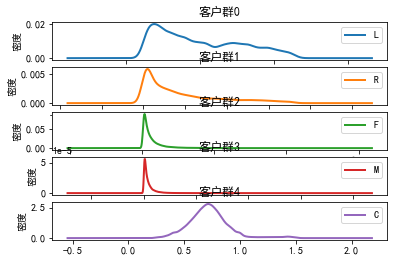

<module 'matplotlib.pyplot' from 'E:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [39]:
#绘制群体密度图
def density_plot(data):
    plt.rcParams['font.sans-serif'] = 'SimHei' 
    plt.rcParams['axes.unicode_minus'] = False
    p=data3.plot(kind='kde',linewidth=2,subplots=True,sharex=False)
    [p[i].set_ylabel('密度') for i in range(5)]
    [p[i].set_title('客户群%d' %i) for i in range(5)]
    plt.legend()
    plt.show()
    return plt
density_plot(data4)

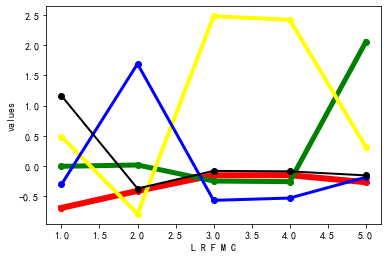

In [41]:
#LRFMC模型可视化图
clu=kmodel.cluster_centers_
x=[1,2,3,4,5]
colors=['red','green','yellow','blue','black']
for i in range(5):
    plt.plot(x,clu[i],label='clustre'+str(i),linewidth=6-i,color=colors[i],marker='o')
    plt.xlabel('L R F M C')
    plt.ylabel('values')
plt.show()

蓝色代表的客户群1在特征C处的值最大，在特征F、M处的值较小，说明客户群1是偏好乘坐高级舱位的客户群；

黑色代表的客户群2在特征F和M上的值最大，且在特征R上的值最小，说明客户群2的会员频繁乘机且最近都有乘机记录；

绿色代表的客户群3在特征R处值最大，在其他特征处的值都较小，说明客户群3已经很久没有乘坐飞机，是入会时间短的低价值的客户群；

黄色代表的客户群4在所有特征上的值都较小，且特征L处的值最小，说明客户群4属于新入会员较多的客户群；

红色代表的客户群5在特征L处的值最大，在特征R处的值最小，其他都比较适中，说明客户群5入会时间长，飞行频率也较高，是有较高价值的客户.

In [42]:
#输出聚类分群的结果
cluster_center=pd.DataFrame(kmeans_model.cluster_centers_,columns=['ZL','ZR','ZF','ZM','ZC'])
cluster_center.index=pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:,0]
cluster_center

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
k=5 

kmeans_model=KMeans(n_clusters=k,random_state=123)

fit_kmeans=kmeans_model.fit(data4)
kmeans_cc=kmeans_model.cluster_centers_
print('各聚类中心为:\n',kmeans_cc)

kmeans_labels=kmeans_model.labels_
print('各样本的类别标签为:\n',kmeans_labels)

r1=pd.Series(kmeans_model.labels_).value_counts()
print('最终每个类别的数目为:\n',r1)

cluster_center=pd.DataFrame(kmeans_model.cluster_centers_,columns=['ZL','ZR','ZF','ZM','ZC'])
cluster_center.index=pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:,0]
print(cluster_center)


各聚类中心为:
 [[ 1.16093248e+00 -3.77435337e-01 -8.66348872e-02 -9.45412837e-02
  -1.56891750e-01]
 [ 4.83547856e-01 -7.99406838e-01  2.48313493e+00  2.42423773e+00
   3.09784796e-01]
 [ 4.07518560e-02 -2.32991649e-03 -2.32406018e-01 -2.36765681e-01
   2.16898713e+00]
 [-3.13069791e-01  1.68706523e+00 -5.73905824e-01 -5.36721020e-01
  -1.75465240e-01]
 [-7.00312784e-01 -4.15124875e-01 -1.60625441e-01 -1.60329613e-01
  -2.58201430e-01]]
各样本的类别标签为:
 [1 1 1 ... 4 3 3]
最终每个类别的数目为:
 4    24611
0    15730
3    12111
1     5337
2     4255
dtype: int64
         ZL        ZR        ZF        ZM        ZC
0                                                  
1  1.160932 -0.377435 -0.086635 -0.094541 -0.156892
2  0.483548 -0.799407  2.483135  2.424238  0.309785
0  0.040752 -0.002330 -0.232406 -0.236766  2.168987
4 -0.313070  1.687065 -0.573906 -0.536721 -0.175465
3 -0.700313 -0.415125 -0.160625 -0.160330 -0.258201


# 7、客户分群可视化

(6,)
(12,)


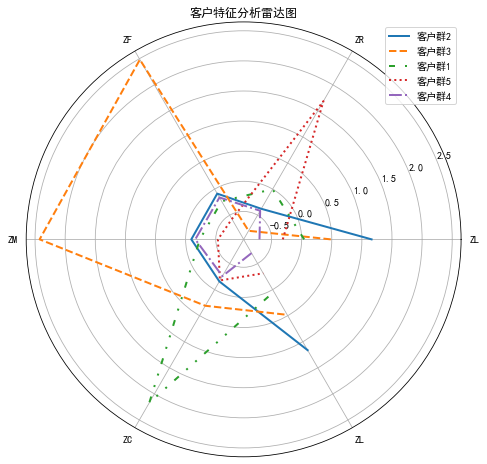

In [45]:
#绘制雷达图
%matplotlib inline
import matplotlib.pyplot as plt
labels=['ZL','ZR','ZF','ZM','ZC','ZL']
legen=['客户群' + str(i+1) for i in cluster_center.index]
lstype=['-','--',(0,(3,5,1,5,1,5)),':','-.']
kinds=list(cluster_center.iloc[:,0])

#雷达图要保证数据闭合，需要再添加L列，并转换为np.ndarray
cluster_center=pd.concat([cluster_center,cluster_center[['ZL']]],axis=1)
centers=np.array(cluster_center.iloc[:,0:])
n=len(labels)
angle=np.linspace(0,2*np.pi,n,endpoint=False)
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,polar=True)

plt.rcParams['font.sans-serif'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False

print(angle.shape)
print(centers[1].shape)
for i in range(len(kinds)):
    ax.plot(angle, centers[i][:6], linestyle=lstype[i], linewidth=2, label=kinds[i])
#添加属性标签
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('客户特征分析雷达图')
plt.legend(legen)
plt.show()

客户关系长度L，消费时间间隔R，消费频率F，飞行里程M，折扣系数的平均值C。 横坐标上，总共有五个节点，按顺序对应LRFMC。 对应节点上的客户群的属性值，代表该客户群的该属性的程度。

我们重点关注的是L，F，M，从图中可以看到：

1、客户群4的F,M很高，L也不低，可以看做是重要保持的客户；

2、客户群3重要发展客户；

3、客户群1重要挽留客户，原因：入会时间长，但是F,M较低 ；

4、客户群2 一般客户；

5、客户群5低价值客户；

重要保持客户：R（最近乘坐航班）低，F（乘坐次数）、C（平均折扣率高，舱位较高）、M（里程数）高。最优先的目标，进行差异化管理，提高满意度。

重要发展客户：R低，C高，F或M较低，潜在价值客户。虽然说，当前价值不高，但是却有很大的发展潜力，促使这类客户在本公司消费和合作伙伴处消费。

重要挽留客户：C、F、M较高，但是较长时间没有乘坐（R）小。增加与这类客户的互动，了解情况，采取一定手段，延长客户生命周期。

一般与低价值客户：C、F、M、L低，R高。他们可能是在公司打折促销时才会乘坐本公司航班。